In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt



#### This is code to See your Visualization Within your Jupyter Notebokk
### Code source is 
[click](https://github.com/machinelearning147/MachineLearning-YouTube/blob/master/src/Visualizing%20TensorFlow%20Graphs.ipynb)

In [2]:
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [5]:
## Check Version of your Tensorflow
display("Tensorflow version is" + (tf.__version__))


'Tensorflow version is1.8.0'

In [7]:
pwd  ## To check you current Working Directory

'H:\\Tensorflow-101'

### Building, Running, and Visualizing The tensorflow Model 
#### To access full Tutorial 
[click](https://app.pluralsight.com/library/courses/tensorflow-understanding-foundations/table-of-contents)


In [13]:
g = tf.Graph()      ## Initialize a graph 
with g.as_default():
    
    ### Let's define some constant

    a = tf.constant(6 , name = 'constant_a')
    b = tf.constant(3 , name = 'constant_b')
    c = tf.constant(10 , name = 'constant_c')
    d = tf.constant(5 , name = 'constant_d')

    ## Create Some operations on them

    mul = tf.multiply(a ,b  ,name='mul')
    div = tf.div(c, d ,name='div')
    addn = tf.add_n([mul ,div] , name='addn')
    

### All these steps constructed A graph in tf  but it is not executed yet

#### Running and graph

#### To get Actual values of computation we have to run the graph that is build 
#### In tensorflow first we built a graph then run it on multiple instances

### We run tf.Session to make sesson object which will spervise whole process of execution

In [10]:
sess = tf.Session()

In [11]:
display(sess.run(addn))
display(sess.run(mul))
display(sess.run(div))


20

18

2

### We can call seeson to run on node and graph will run only till that node not beyond that node

In [16]:
tf.summary.FileWriter("logs", g).close()  ## Open the graph
show_graph(g) ## By running function and closing it simultainiously
sess.close()
### Close the session its good habit

In [21]:
g = tf.Graph()      ## Initialize a graph 
with g.as_default():
    
    ## Define Some constant
    
    a = tf.constant(6.5 , name = "constant_a")
    b = tf.constant(3.4 , name = "constant_b")
    c = tf.constant(3.0 , name = "constant_c")
    d = tf.constant(100.2 , name = "constant_d")
    
    ##Do some calculations on them 
    
    square = tf.square(a , name = 'square_a')
    power = tf.pow(b,c,name = "pow_b_c")
    sqrt = tf.sqrt(d,name = 'sqrt_d')
    final_sum = tf.add_n([square , power , sqrt] , name = 'final_sum')
    another_sum = tf.add_n([a,b,c,d,power] , name='another')
    sess = tf.Session()
    

### There are many more mathe operation are there explore them in Tensorflow documentation

In [22]:
display(sess.run(square))
display(sess.run(power))
display(sess.run(sqrt))
display(sess.run(final_sum))

42.25

39.304005

10.009995

91.563995

In [23]:
tf.summary.FileWriter("logs", g).close()  ## Open the graph
show_graph(g) ## By running function and closing it simultainiously
sess.close()

### Rank of tensor 


In [24]:
sess = tf.Session()
Zerod =  tf.constant(5)

In [25]:
sess.run(tf.rank(Zerod))

0

In [26]:
oneD = tf.constant(['How' , 'are'  , 'you'])
sess.run(tf.rank(oneD))

1

In [29]:
twoD =  tf.constant([[1.0 , 2.3] , [1.5,2.9]])
sess.run(tf.rank(twoD))

### So we can extend to n-dimension

2

## Let's Explore some more mathematical operation on tensors

In [30]:
g = tf.Graph()

with g.as_default():

    x = tf.constant([100,200,300] , name='x')
    y = tf.constant([1,2,3] , name='y')
    sum_x = tf.reduce_sum(x , name ='sum_x')
    prod_y  =tf.reduce_prod(y , name='prod_y')

    final_div = tf.div(sum_x , prod_y , name = 'final_div')
    final_mean = tf.reduce_mean([sum_x , prod_y] ,name ="final_mean")

    sess = tf.Session()

In [31]:
display(sess.run(x))
display(sess.run(y))
display(sess.run(sum_x))
display(sess.run(prod_y))
display(sess.run(final_div))
display(sess.run(final_mean))

array([100, 200, 300])

array([1, 2, 3])

600

6

100

303

In [32]:
tf.summary.FileWriter("logs", g).close()  ## Open the graph
show_graph(g) ## By running function and closing it simultainiously
sess.close()

In [33]:
import numpy as np

#### Tensorflow is perfectly Compatible with NumPy

#### Numpy Araays can be treated as tensors
###  np.int32 == tf.int32

In [35]:
sess = tf.Session()
zeroD = np.array(30 ,dtype=np.int32)
oneD = np.array([5.6,2.2,3.2,9.0] , dtype=np.float32)

In [36]:
display(sess.run(tf.rank(zeroD)))
display(sess.run(tf.shape(zeroD)))
display(sess.run(tf.rank(oneD)))
display(sess.run(tf.shape(oneD)))

0

array([], dtype=int32)

1

array([4])

### Tensor are n-dimensional array

### PlaceHolders In tensorflow

##### Placeholders hold the place for a Tensor whose value will be available to it only at runtime.


In [55]:
g = tf.Graph()

with g.as_default():   
    
    ## We defined some place holders 

    x = tf.placeholder(tf.int32 , shape=[3] , name = 'x')
    y = tf.placeholder(tf.int32 , shape=[3] , name = 'y')

    ## Done some math operation on them but there value is still unknown
    sum_x = tf.reduce_sum(x , name ='sum_x')
    prod_y  =tf.reduce_prod(y , name='prod_y')

    final_div = tf.div(sum_x , prod_y , name = 'final_div')
    final_mean = tf.reduce_mean([sum_x , prod_y] ,name ="final_mean")
    sess =  tf.Session()

In [56]:
tf.summary.FileWriter("logs", g).close()  ## Open the graph
show_graph(g) ## By running function and closing it simultainiously

In [57]:
display("sum(x):" , sess.run(sum_x , feed_dict={x:[100,200,300]}))   ## we have to specify placeholder x

display("prod(y):" , sess.run(prod_y , feed_dict={y:[1,2,3]}))   ## we have to specify placeholder x

display("sum(x)/prod(y):" , sess.run(final_div , feed_dict={x:[10,20,30],y:[1,2,3]})) 


## we have to specify placeholder x and y both for this node beacuse this node requres both values to be executed
sess.close()

'sum(x):'

600

'prod(y):'

6

'sum(x)/prod(y):'

10

### Important Parameters  to fed into sess.run( )


## Fetches and the Feed Dictionary

#####  The fetches parameter always holds the node that you want to compute when you pass it to Session.run
 The fetches parameter indicates what it is that we want to compute, 
#####   And feed_dict is used to provide placeholders and variables to the sess.run


#### sess.run(fetches , feed_dict)

In [68]:
### y = Wx + b

W = tf.constant([10,100] , name='const_w')

## While instantiating these placeholders, we haven't specified a shape for the Tensor that it holds, 
### which means these placeholders can be Tensors of any shape.

x = tf.placeholder(tf.int32 , name = 'x')
b = tf.placeholder(tf.int32 , name = 'y')

## operations

Wx = tf.multiply(W , x , name="Wx") ##every element of W will be multiplied by every element of x. 
                                    ##W and x have to be compatible Tensors, which means x has to be the same shape
                                    ##and rank as W.
y = tf.add(Wx ,b , name="y")

# y_ = x - b

y_ = tf.subtract(x , b , name="y_")


sess = tf.Session()

In [70]:
display(print("intermediate value :" , sess.run(Wx , feed_dict={x:[3,33]})))
display(print("Final value : Wx + b = " , sess.run(y , feed_dict={x:[5 , 50] , b:[7 ,9]})))

## Think of every Session.run as an independent calculation of the node that we've specified

# you do not need to specify every value from scratch. You can also specify intermediate values
## to run y let's specify Wx directly instead of specifying x

display(print("for intermedite value of Wx := " , sess.run(fetches=y , feed_dict={Wx:[100 , 1000] , b:[7 ,9]})))

## You can mention fetches=node or its same by default
#Allowing us to specify intermediate values is very useful for debugging.


#We want to calculate the values of the nodes y as well as y_ in the same Session.run statement.
#The fetches parameter should simply be an array which contains all the nodes that you want computed.


display(print("Two results :[Wx + b , x-b] = " ,sess.run(fetches=[y , y_] , feed_dict={x:[5,50] , b :[7,9]})))

sess.close()


intermediate value : [  30 3300]


None

Final value : Wx + b =  [  57 5009]


None

for intermedite value of Wx :=  [ 107 1009]


None

Two results :[Wx + b , x-b] =  [array([  57, 5009]), array([-2, 41])]


None

## variables

Variables in TensorFlow are constructs which allow you to change the value that is stored within them
.Variables are mutable Tensor values that persist across multiple calls to Session.run. They hold their value 'til they're explicitly updated.

In [76]:
# y =Wx + b

W = tf.Variable([2.5,4.0] , tf.float32 , name="var_w")

x = tf.placeholder(tf.float32 ,name = 'x')

b = tf.Variable([5.0,10.0] ,tf.float32 , name = "var_b")

y = W*x + b

## Initialize variables

init = tf.global_variables_initializer()  ## this is alsp a computation node

with tf.Session() as sess:    ## easy way to run multiple sessions
    
    sess.run(init)  ## otherwise error will be thrown
    print("Final result : Wx + b  = " ,(sess.run(y , feed_dict={x:[10 , 100]})))
    
    

Final result : Wx + b  =  [  30.  410.]


In [79]:
# s = W*x

s = W*x

## Initialize only those value which you might need

init = tf.variables_initializer([W])
with tf.Session() as sess :   ## this will be a seperate session
    
    sess.run(init)
    #print("this will throw error" , (sess.run(y , feed_dict={x:[10 , 100]})))
    print("Result : Wx =" , sess.run(s,feed_dict={x:[10 , 100]}))
    


Result : Wx = [  25.  400.]


#### Let's see How variables got Updated during Computation



In [82]:
number = tf.Variable(2)
multiplier = tf.Variable(1)

init = tf.global_variables_initializer()

result = number.assign(tf.multiply(number ,multiplier)) ## result is computation node

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10):
        print("Result : number*Multiplier" , sess.run(result))
        print("increment in multiplier ,updated value =" , sess.run(multiplier.assign_add(1)))
    print("see the updated values")    



Result : number*Multiplier 2
increment in multiplier ,updated value = 2
Result : number*Multiplier 4
increment in multiplier ,updated value = 3
Result : number*Multiplier 12
increment in multiplier ,updated value = 4
Result : number*Multiplier 48
increment in multiplier ,updated value = 5
Result : number*Multiplier 240
increment in multiplier ,updated value = 6
Result : number*Multiplier 1440
increment in multiplier ,updated value = 7
Result : number*Multiplier 10080
increment in multiplier ,updated value = 8
Result : number*Multiplier 80640
increment in multiplier ,updated value = 9
Result : number*Multiplier 725760
increment in multiplier ,updated value = 10
Result : number*Multiplier 7257600
increment in multiplier ,updated value = 11
see the updated values


### Let's See How to define multiple graph and view them

In [ ]:
g1 = tf.Graph()
with g1.as_default():
    with tf.Session as sess:
        
        """
        
        run your code here
        
        
        use assert statement to confirm
        
        
        assert y.graph is g1
        """

        
g2 = tf.Graph()
with g2.as_default():
    with tf.Session as sess:
        
        """
        
        run your code here
        
        
        use assert statement to confirm 
        
        assert y.graph is g2
        
        """    

## Name Scope

We really need a way to organize things in TensorBoard, and this we can do using named scopes.

Named scopes let you logically group your computations and see how data flows.

In [98]:
g = tf.Graph()

with g.as_default():
    with tf.Session() as sess:
        
        A = tf.constant([4], tf.int32 , name="A")
        B = tf.constant([5], tf.int32 , name="B")
        C = tf.constant([6], tf.int32 , name="C")
        
        x = tf.placeholder(tf.int32  ,  name ='x')
        
        # Ax^2 + Bx+ C 
        
        Ax2_1 = tf.multiply(A ,tf.pow(x,2) , name = "Ax2_1")
        
        Bx = tf.multiply(B ,x ,name = "Bx")
        y1 = tf.add_n([Ax2_1 ,Bx ,C] , name = "y1")
        
        
        # y = Ax^2+Bx^2
        Ax2_2 = tf.multiply(A ,tf.pow(x,2) , name = "Ax2_2")
        
        Bx2 = tf.multiply(B ,x ,name = "Bx2")
        y2 = tf.add_n([Ax2_1 ,Bx] , name = "y2")
        
        
        y = y1+y2
        
        print(sess.run(y , feed_dict={x:[5]}))
        
        tf.summary.FileWriter("logs", g).close()  ## Open the graph
        show_graph(g)
        
        
    

[256]


#### Here you can see that this graph became so much complicated and hard to visualize and see the flow of computation

### Let's use name scope for same comptation

We have three named scopes in this program. The first two named scopes feed into the third. Think of these named scopes as logical blocks of code that you might want to debug separately in TensorBoard.

In [101]:
g = tf.Graph()   
with g.as_default():
    A = tf.constant([4], tf.int32 , name="A")
    B = tf.constant([5], tf.int32 , name="B")
    C = tf.constant([6], tf.int32 , name="C")

    x = tf.placeholder(tf.int32  ,  name ='x')

    # Ax^2 + Bx+ C 
    with tf.name_scope("Equation_1"):
        Ax2 = tf.multiply(A ,tf.pow(x,2) , name = "Ax2")

        Bx = tf.multiply(B ,x ,name = "Bx")
        y1 = tf.add_n([Ax2 ,Bx ,C] , name = "y1")


    # y = Ax^2+Bx^2
    with tf.name_scope("Equation_2"):
        Ax2 = tf.multiply(A ,tf.pow(x,2) , name = "Ax2")

        Bx2 = tf.multiply(B ,x ,name = "Bx2")
        y2 = tf.add_n([Ax2 ,Bx] , name = "y2")

    with tf.name_scope("final_sum"):
        y = y1+y2
    with tf.Session() as sess:
        
        print(sess.run(y , feed_dict={x:[5]}))

tf.summary.FileWriter("logs", g).close()  ## Open the graph
show_graph(g)


[256]


### We can see that Now our graph loks Much better and we can debug it easily because of different blocks of 
### code
When you work on real machine learning programs with thousands of nodes, named scopes are an extremely handy tool to manage how your graph looks and to enable debugging.

### Interactive  sessions in TensorFlow 

Interactive sessions allow you to work with a session in TensorFlow without holding a reference to the session instance.

In [114]:
sess = tf.InteractiveSession() #Storing it in the sess variable is not required if you're using interactive sessions
A = tf.constant([4] , tf.int32 , name = "A")
x = tf.placeholder(tf.int32 , name = 'x')

y = A*x

y.eval(feed_dict={x:[5]}) #We can simply run y.eval, and it'll automatically pick up the default interactive session



C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


array([20])

#### Running   y.eval    with an interactive session is the equivalent of    tf.get_default_session().run(y)

nteractive sessions function exactly like regular sessions except that it makes writing TensorFlow code much less cumbersome

### Quick Overview: Linear Regression in TensorFlow


This is a quick overview of linear regression implemented in TensorFlow for the sake of completeness. 


### Working with Images in Tensorflow

Neural networks are a class of deep learning algorithms that perform really well in image recognition. This means that understanding how these images are represented in TensorFlow and working with these images become very important.

As we learn more about applying machine learning techniques to recognize images, neural networks, specifically convolutional neural networks work very well for hard image recognition tasks. 

In [115]:
import matplotlib.image as mp_image
import os

In [117]:
filename = "./Dendelion.JPG"


In [118]:
image  = mp_image.imread(filename)  ##The image variable holds the resultant image as a NumPy array


In [119]:
display("Image shape" , image.shape)   ## This will give shape of the image
display("Image array" , image)  ## This will show the arrray of the each pixel

'Image shape'

(1920, 2560, 3)

'Image array'

array([[[ 20,  85,   5],
        [ 27,  94,  14],
        [ 20,  89,   6],
        ..., 
        [ 20,  96,   0],
        [ 17,  95,   0],
        [ 15,  96,   0]],

       [[ 18,  84,   0],
        [ 21,  89,   4],
        [ 15,  85,   0],
        ..., 
        [ 20,  94,   0],
        [ 19,  94,   0],
        [ 15,  92,   0]],

       [[ 19,  89,   0],
        [ 20,  91,   0],
        [ 17,  88,   0],
        ..., 
        [ 18,  88,   0],
        [ 20,  93,   4],
        [ 16,  88,   2]],

       ..., 
       [[ 38, 105,  10],
        [ 33, 103,   5],
        [ 39, 111,   9],
        ..., 
        [ 36,  47,   0],
        [ 34,  54,   0],
        [ 28,  54,   0]],

       [[ 33, 111,   2],
        [ 30, 106,   0],
        [ 37, 110,   2],
        ..., 
        [ 35,  43,   0],
        [ 37,  50,   0],
        [ 30,  51,   0]],

       [[ 27, 114,   0],
        [ 26, 109,   0],
        [ 35, 112,   0],
        ..., 
        [ 36,  44,   0],
        [ 41,  50,   0],
        [ 37,  49,

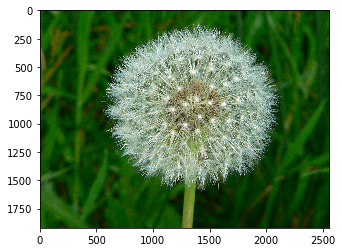

In [120]:
plt.imshow(image)
plt.show()

### Transposing Images

transposed image shape (2560, 1920, 3)


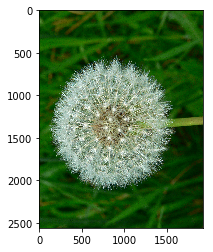

In [126]:
x= tf.Variable(image ,name="x") #  x holds this image as a tensor.
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    transpose = tf.transpose(x,perm=[1,0,2])  ## We are swapping 1 and 0
    result = sess.run(transpose)
    print("transposed image shape" , result.shape)
    plt.imshow(result)
    plt.show()
    



#### We can see that dimensions are exchanged and image is trannsposed

### Here is another easy way to do it in Tensorflow 

transposed image shape (2560, 1920, 3)


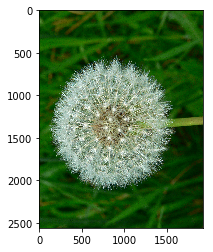

In [127]:
x= tf.Variable(image ,name="x") #  x holds this image as a tensor.
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    transpose = tf.image.transpose_image(x)  ## same work easily
    result = sess.run(transpose)
    print("transposed image shape" , result.shape)
    plt.imshow(result)
    plt.show()

### Tranforming the images

In [128]:
from PIL import Image

In [129]:
original_image_list = ["./image/1.jpg",
                      "./image/2.jpg",
                      "./image/3.jpg",
                      "./image/4.jpg"]

In [142]:
### Make a queue of file name usin name construct
filename_queue = tf.train.string_input_producer(original_image_list) #takes in all the strings within our original_image_ 
                                                                      # list and creates a queue of these file names
# rread entire image file
image_reader = tf.WholeFileReader()

with tf.Session() as sess:
    
    #Coordinate the loading of image file
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess , coord=coord)
    image_list =[]
    
    for i in range(len(original_image_list)):
        # Read whole file in the queue ,the first value returned in the tuple is file name
        # which we are ignoring
        
        _ ,image_file = image_reader.read(filename_queue)
        
        
        # Decode the image as JPEG format ,this will turn it into a tensor which we can use
        # later in the training process
        
        image = tf.image.decode_jpeg(image_file)
        
        # get a tensor of resized image
        image =  tf.image.resize_images(image ,[224,224])
        
        image.set_shape((224,224,3))
        
        image_array = sess.run(image)
        print(image_array.shape)
        
        Image.fromarray(image_array.astype('uint8'),'RGB').show()
        
        image_list.append(tf.expand_dims(image_array , 0))
        
    # Finisg all the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)
    
    index = 0

    ## Write image summary
    summary_writer  = tf.summary.FileWriter('./m4_example2' , graph = sess.graph)
    
    for image_tensor in image_list:
        summary_str = sess.run(tf.summary.image("image-" +str(index) ,image_tensor))
        summary_writer.add_summary(summary_str)
        index+=1
    
    summary_writer.close()
    
    
    
    
    
    
    
    
    
    
### This summary you can view in your Tensorboard visualization    
    
### Use tensorboard --logdir = "m4_example2"    
    
    
    
    


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


### Some more operations on images

In [150]:
### Make a queue of file name usin name construct
filename_queue = tf.train.string_input_producer(original_image_list) #takes in all the strings within our original_image_ 
                                                                      # list and creates a queue of these file names
# rread entire image file
image_reader = tf.WholeFileReader()

with tf.Session() as sess:
    
    #Coordinate the loading of image file
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess , coord=coord)
    image_list =[]
    
    for i in range(len(original_image_list)):
        # Read whole file in the queue ,the first value returned in the tuple is file name
        # which we are ignoring
        
        _ ,image_file = image_reader.read(filename_queue)
        
        
        # Decode the image as JPEG format ,this will turn it into a tensor which we can use
        # later in the training process
        
        image = tf.image.decode_jpeg(image_file)
        
        # get a tensor of resized image
        image =  tf.image.resize_images(image ,[224,224])
        
        image.set_shape((224,224,3))
        
        image = tf.image.flip_up_down(image)
        
        
        image  = tf.image.central_crop(image , central_fraction=0.5)
        
        image_array = sess.run(image)
        print(image_array.shape)
        
        ## Convert numy array to a tensor
        image_tensor = tf.stack(image_array)
        print(image_tensor)
        
        image_list.append(image_tensor)
        
    # Finisg all the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)
    
    
    ## Convert all tensor in single tensor of 4 dimension
    ## First dimension is the number of images in the list and rest is same
    
    images_tensor = tf.stack(image_list)
    print(images_tensor)
    
    summary_writer = tf.summary.FileWriter('./m4_example3' , graph = sess.graph)
    
    
    ## Write all the summary in single code 
    summary_str = sess.run(tf.summary.image("images" , images_tensor ,max_outputs=4))
    summary_writer.add_summary(summary_str)
    
    summary_writer.close()
    
    
    
    
    
    
    
    
    
    
### This summary you can view in your Tensorboard visualization    
    
### Use tensorboard --logdir = "m4_example3"    
    
    
    
    


(112, 112, 3)
Tensor("stack_14:0", shape=(112, 112, 3), dtype=float32)
(112, 112, 3)
Tensor("stack_15:0", shape=(112, 112, 3), dtype=float32)
(112, 112, 3)
Tensor("stack_16:0", shape=(112, 112, 3), dtype=float32)
(112, 112, 3)
Tensor("stack_17:0", shape=(112, 112, 3), dtype=float32)
Tensor("stack_18:0", shape=(4, 112, 112, 3), dtype=float32)


### Working with MNIST  DataSet   Using KNN   algorithm

In [151]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist_data", one_hot=True)
training_digits , training_labels = mnist.train.next_batch(5000)

test_digits , test_labels = mnist.train.next_batch(200)




Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [ ]:
# Input images
training_digits_pl = tf.placeholder("float" , [None ,784])



test_digit_pl = tf.placeholder("float" , [784])
# nearest neighbours using L1 Distance

l1_distance = tf.abs(tf.add(training_digits_pl , tf.negative(test_digit_pl)))

distance = tf.reduce_sum(l1_distance , axis=1)


pred = tf.arg_min(distance , 0)

accuracy = 0

#Initializa the variable
init = tf.global_variables_initializer()
with tf.Session()  as sess:
    sess.run(init)
    
    ## loop over all the test digts
    
    for i in range(len(test_digits)):
        nn_index = sess.run(pred , feed_dict={training_digits_pl:training_digits , test_digit_pl:test_digits[i ,:]})
        
        print("Test" , i , "Prediction : " , np.argmax(training_labels[nn_index]) , "True label:" ,np.argmax(test_labels[i]))
        
        if np.argmax(training_labels[nn_index]) == np.argmax(test_labels[i]):
            accuracy += 1/len(test_digits)
            
        print("done")
        print("accuracy: " , accuracy)









#### Y0u can see our Accuracy is approximately 95%  which is pretty good 